# Wordcloud

In [1]:
from utils import *
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from os import path
from PIL import Image

In [2]:
tweet_stocks = pd.read_pickle('./data/pre_processed_df.pkl')

In [3]:
text = ' '.join(tweet_stocks['text'])

In [4]:
len(text)

3981935

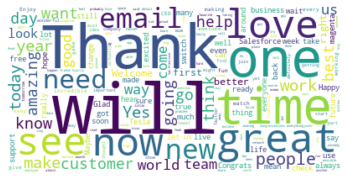

In [5]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
twitter_mask = np.array(Image.open("./data/580b57fcd9996e24bc43c53e.png"))
twitter_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

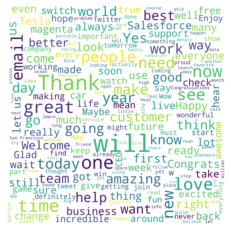

In [7]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", mask=twitter_mask).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
wc = WordCloud(background_color="white", max_words=1000, mask=twitter_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

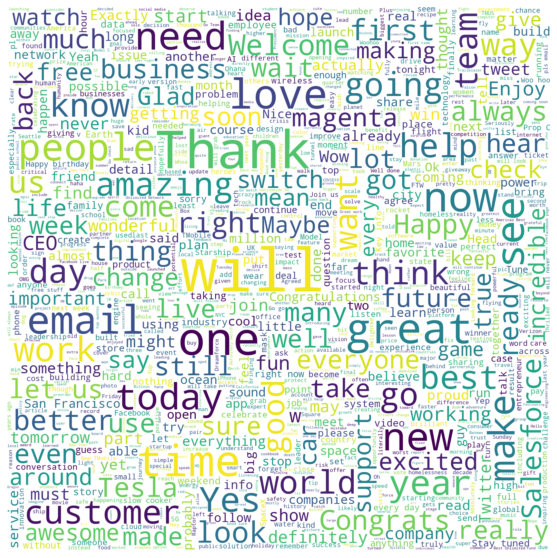

In [9]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [11]:
transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)

for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

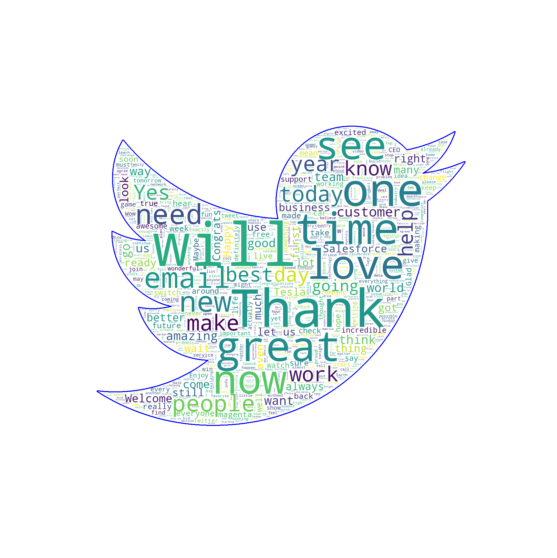

In [12]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_twitter_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='blue')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./figures/twitter_word_cloud.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()